# CS 178 Homework 5
### Aditya Iyer - 24377286

## Problem 1
### 1.1

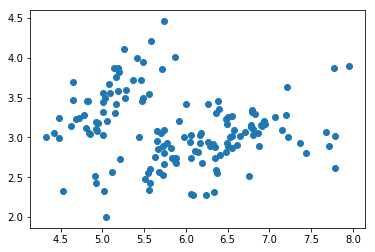

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import sys

import scipy.linalg

iris = np.genfromtxt("data/iris.txt", delimiter=None)
X = iris[:,[0,1]]
Y = iris[:,-1]

plt.scatter(X[:,0], X[:,1])
plt.show()

The data appears to be clustered into two groups, with a clear linear boundary between them.

### 1.2

Cluster for k=2: 


/Users/HungryAdi/Coursework/MachineLearning/HW5-code/mltools/plot.py:42: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  hld = axis.ishold();
/Users/HungryAdi/Coursework/MachineLearning/HW5-code/mltools/plot.py:43: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  axis.hold(True);
/Users/HungryAdi/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/HungryAdi/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is depreca

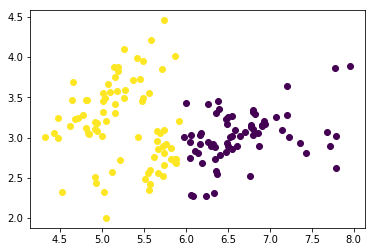

Cluster for k=5:


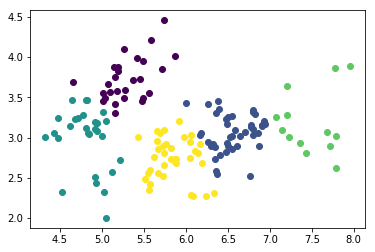

Cluster for k=20:


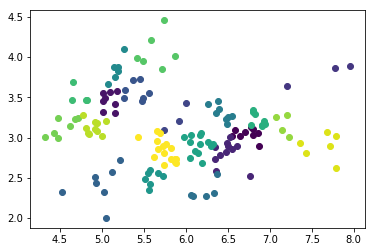

In [24]:
minZarr = []
for i, k in enumerate([2,5, 20]):
    minZ = []
    minSum = sys.maxsize
    
    for j in range(0, 5):
        Z, _, sumK = ml.cluster.kmeans(X, k)
        if sumK < minSum:
            minZ = Z
            minSum = sumK                
    minZarr.append(minZ)
    
print("Cluster for k=2: ")
ml.plotClassify2D(None, X, minZarr[0])
plt.show()

print("Cluster for k=5:")
ml.plotClassify2D(None, X, minZarr[1])
plt.show()

print("Cluster for k=20:")
ml.plotClassify2D(None, X, minZarr[2])
plt.show()

### 1.3

Clustering for k= 2 using single linkage


/Users/HungryAdi/Coursework/MachineLearning/HW5-code/mltools/plot.py:42: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  hld = axis.ishold();
/Users/HungryAdi/Coursework/MachineLearning/HW5-code/mltools/plot.py:43: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  axis.hold(True);
/Users/HungryAdi/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/HungryAdi/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is depreca

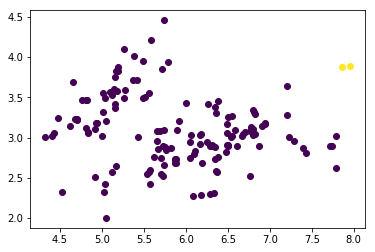

Clustering for k= 2 using complete linkage


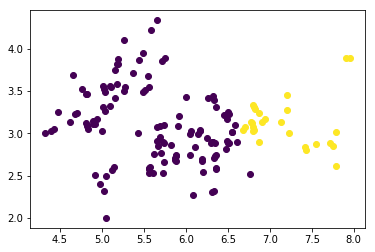

Clustering for k= 5 using single linkage


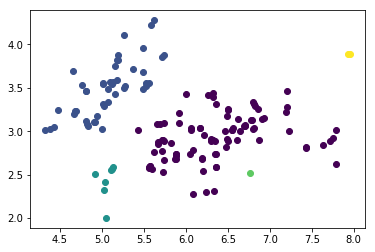

Clustering for k= 5 using complete linkage


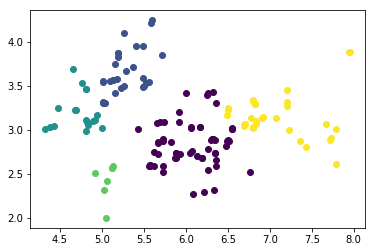

Clustering for k= 20 using single linkage


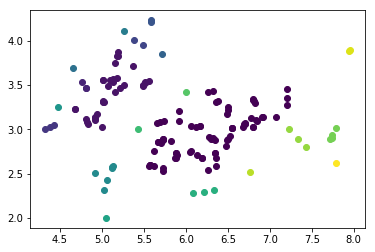

Clustering for k= 20 using complete linkage


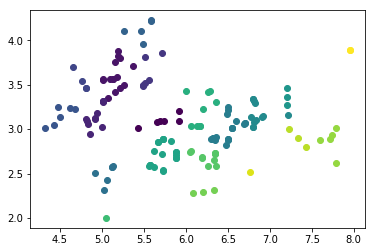

In [46]:
for k in [2,5, 20]:
    z, join = ml.cluster.agglomerative(X, k, method='min')
    print("Clustering for k= {} using single linkage".format(k))
    ml.plotClassify2D(None, X, z)
    plt.show()
    
    z, join = ml.cluster.agglomerative(X, k, method='max')
    print("Clustering for k= {} using complete linkage".format(k))
    ml.plotClassify2D(None, X, z)
    plt.show()

Between agglomerative and Kmeans clustering, the number of clusters k=5 seems to always produce the best results.

## Problem 2
### 2.1

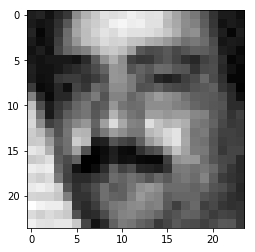

In [48]:
X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset
M,_ = X.shape
plt.figure()
i = np.random.randint(0, M)# pick a data point i for display
img = np.reshape(X[i,:],(24,24)) # convert vectorized data to 24x24 image patches
plt.imshow( img.T , cmap="gray") # display image patch; you may have to squint

plt.show()

### 2.2

In [73]:
mean = np.mean(X, axis=0)
X0 = np.array([x - mean for x in X])

U, s, Vh = scipy.linalg.svd(X0,full_matrices=False)
W = U.dot(np.diag(s))

print("W shape: {}\nVhat shape: {}".format(W.shape,Vh.shape))

W shape: (4916, 576)
Vhat shape: (576, 576)


### 2.3

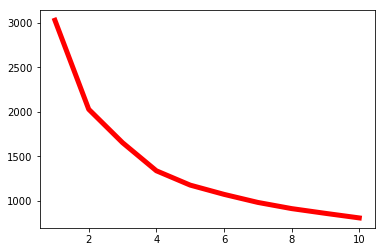

In [91]:
MSE = []

for k in range(0, 10):
    Xhat = np.dot(W[:,:k], Vh[:k,:])
    MSE.append(np.mean((X0 - Xhat) ** 2))

plt.plot(range(1, 11), MSE, 'r', lw=5)
plt.show()

### 2.4

Negative direction for principle direction 1


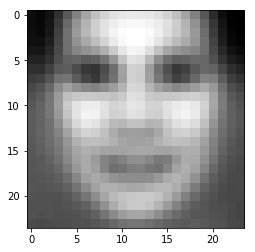

Positive direction for principle direction 1


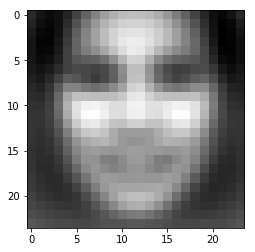

Negative direction for principle direction 2


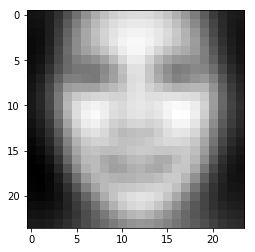

Positive direction for principle direction 2


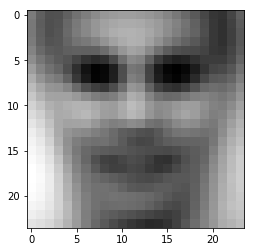

Negative direction for principle direction 3


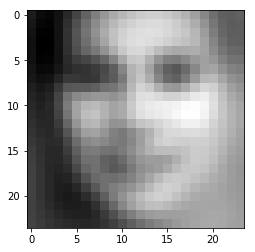

Positive direction for principle direction 3


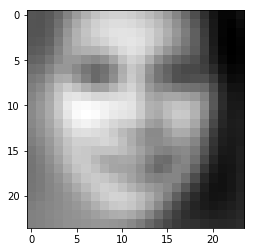

In [98]:
for i in range(0, 3):
    a = 2*np.median(np.abs(W[:,i]))  #scale factor
    
    p = mean - a * Vh[i,:]
    img = np.reshape(p, (24, 24))

    print("Negative direction for principle direction {}".format(i + 1))
    plt.imshow(img.T, cmap='gray')
    plt.show()
   
    p = mean + a * Vh[i,:]
    img = np.reshape(p, (24, 24))
    
    print("Positive direction for principle direction {}".format(i + 1))
    plt.imshow(img.T, cmap='gray')
    plt.show()

### 2.4


Original image for face # 2205


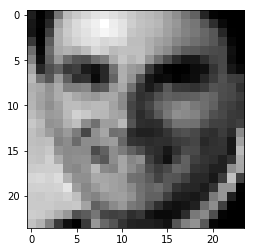

Approximation of face # 2205 where k= 5 


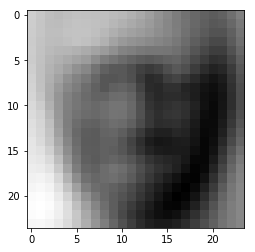

Approximation of face # 2205 where k= 10 


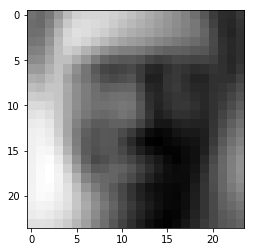

Approximation of face # 2205 where k= 50 


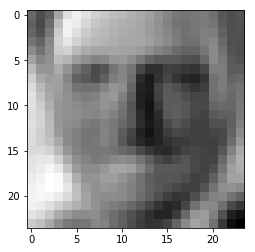

Approximation of face # 2205 where k= 100 


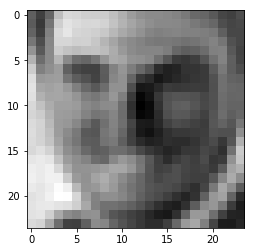

Original image for face # 4832


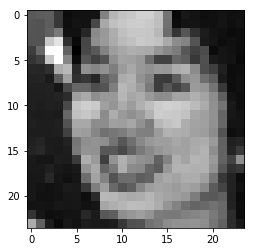

Approximation of face # 4832 where k= 5 


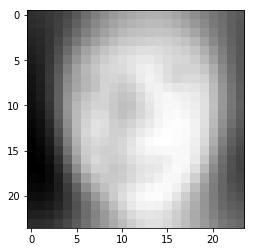

Approximation of face # 4832 where k= 10 


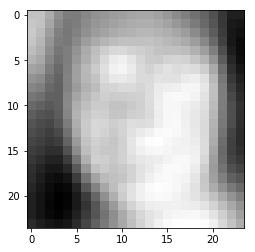

Approximation of face # 4832 where k= 50 


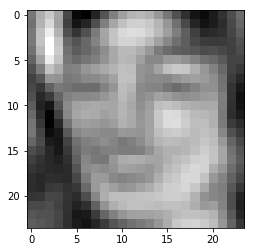

Approximation of face # 4832 where k= 100 


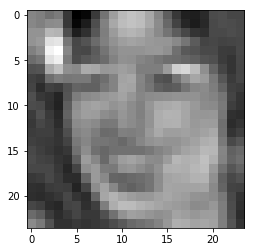

In [90]:
faceHatarr = []
K = [5, 10, 50, 100]
for k in K:
    faceHat = np.dot(W[:,:k], Vh[:k,:])
    faceHatarr.append(faceHat)

faces = np.random.randint(0, M, 2)

for face in faces:
    
    print("Original image for face # {}".format(str(face)))
    img = np.reshape(X[face,:], (24, 24))
    plt.imshow(img.T, cmap="gray")
    plt.show()
    
    for i in range(0, len(K)):
        print("Approximation of face # {} where k= {} ".format(str(face),str(K[i])))
        
        img = np.reshape(faceHatarr[i][face,:], (24, 24))
        plt.imshow(img.T, cmap="gray")
        plt.show()
    


### 2.6

/Users/HungryAdi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """
/Users/HungryAdi/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/HungryAdi/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


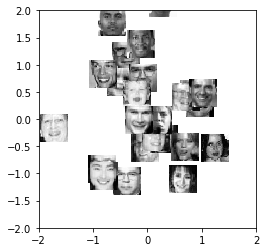

In [89]:
idx = np.random.randint(0,M,25) # pick some data (randomly or otherwise); an array of integer indices

import mltools.transforms
coord,params = ml.transforms.rescale( W[:,0:2] ) # normalize scale of "W" locations
plt.figure(); plt.hold(True); # you may need this for pyplot
for i in idx:
    # compute where to place image (scaled W values) & size
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
    img = np.reshape( X[i,:], (24,24) ) # reshape to square
    plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
    plt.axis( (-2,2,-2,2) ) # set axis to a reasonable scale
    
plt.show()

# Statement of collaboration

I collaborated with Jefferey Araki to discuss problem solving methodologies before solving the problems myself. Some code was taken from the homework assignment.